In [60]:
import pandas as pd  # import the neccessary libraries
pd.set_option('display.max_columns', 300)  # display all the columns
pd.set_option('display.max_rows', 100)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2

plt.style.use('seaborn')
sns.set(style="white")

In [49]:
df = pd.read_csv('kc_house_data_train.csv')  # read in the csv file with train data
print(df.shape)  # check the dimensions of the model
df.head()  # print the first 5 rows

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


# Test 1: Two Sample T-Test, Year Sold

### Null Hypothesis: The mean price of houses sold in 2014 and 2015 are the same


### Alternative Hypothesis: The mean price of houses sold in 2014 and 2015 are different 

In [50]:
##### Create Year_Sold Column #####

df['year_sold'] = df['date'].str[0:4].astype(int)

In [51]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,2015
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2014
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,2014
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,2014


In [52]:
df_2014 = df[df.year_sold == 2014]
df_2015 = df[df.year_sold == 2015]

df_2014.shape, df_2015.shape

((11703, 23), (5587, 23))

In [54]:
ttest_ind(df_2014.price, df_2015.price)

Ttest_indResult(statistic=0.3069020541875544, pvalue=0.75892162179952)

In [40]:
x = ['Sold in 2014', 'Sold in 2015']
y = df.groupby(['year_sold']).price.mean().values[0], df.groupby(['year_sold']).price.mean().values[1]

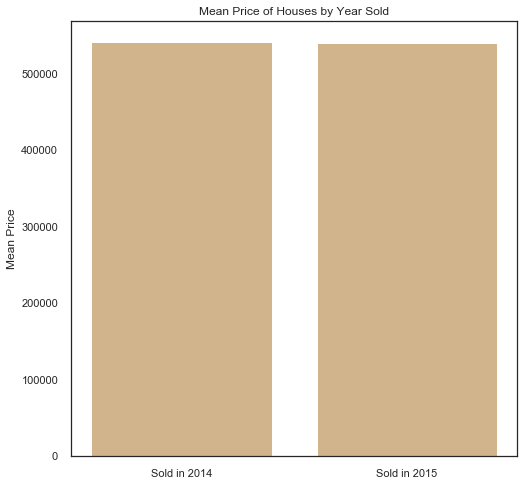

In [43]:
plt.figure(figsize=(8,8))
plt.bar(x, y, color ='tan')
plt.title('Mean Price of Houses by Year Sold')
plt.ylabel('Mean Price')
plt.show()

### Conclusion: Because the P-Value is greater than the T-statistic we accept the Null Hypothesis. The year a house has sold does not have a statistical different in price.

# Test 2: Anova Test, Season Sold

### Null Hypothesis: The season the house sold does not effect price

### Alternative Hypothesis: the season the house sold does effect price

In [55]:
##### Add Season column #####

df['month_sold'] = df['date'].str[4:6].astype(int)

def to_season(x):
    if x == 12 or x == 1 or x == 2:
        return 'winter'
    elif x == 3 or x == 4 or x == 5:
        return "spring"
    elif x == 6 or x == 7 or x == 8:
        return "summer"
    else:
        return 'fall'
df['season_sold'] = df['month_sold'].apply(to_season)

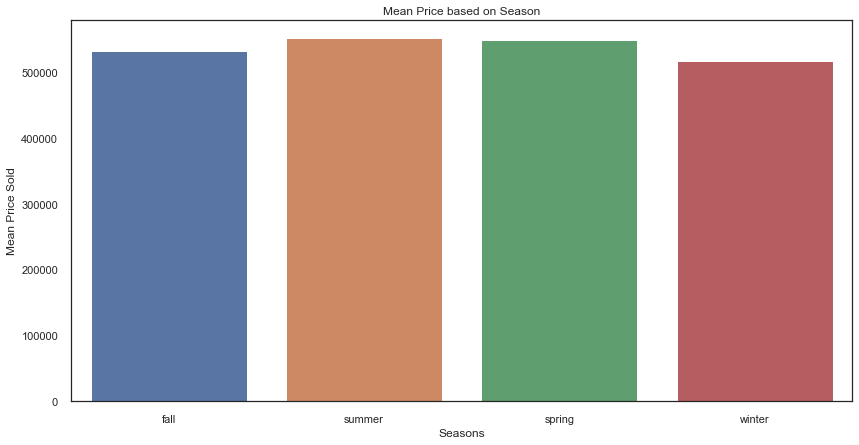

In [56]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x =df['season_sold'].unique() ,y = df.groupby('season_sold')['price'].mean());
ax.set(xlabel='Seasons', ylabel='Mean Price Sold',title='Mean Price based on Season');

In [57]:
f_stats, p_value =stats.f_oneway(df[df['season_sold'].eq('fall')]['price'], 
               df[df['season_sold'].eq('summer')]['price'], 
               df[df['season_sold'].eq('winter')]['price'],
               df[df['season_sold'].eq('spring')]['price'],
                )

In [58]:
print(f'f-stat: {f_stats}, p_value: {p_value}')
print(f'We reject the null hypothesis since our p_value is very small')

f-stat: 6.882461546105217, p_value: 0.00012530436472821217
We reject the null hypothesis since our p_value is very small


# Test 3: Anova, Zipcode(Bin) vs Sqft

In [62]:
##### Zip Codes to Bins #####

price_by_zip = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)
zip_category = pd.cut(price_by_zip, bins =[0,350000,600000,900000,3500000], labels = ['low','medium','high','very_high'])
df['zip_price_level'] = df['zipcode'].apply(lambda x: zip_category.loc[x])
df['zip_price_level'].value_counts()

medium       7301
high         5415
low          3770
very_high     804
Name: zip_price_level, dtype: int64

In [63]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,season_sold,zip_price_level_low,zip_price_level_medium,zip_price_level_very_high,zip_price_level
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,10,fall,0,1,0,medium
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,8,summer,0,0,0,high
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,8,summer,0,0,0,high
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,3,spring,0,1,0,medium
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,7,summer,0,0,0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,2015,3,spring,0,0,0,high
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2014,5,spring,0,0,0,high
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,2014,5,spring,0,1,0,medium
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,2014,12,winter,0,1,0,medium


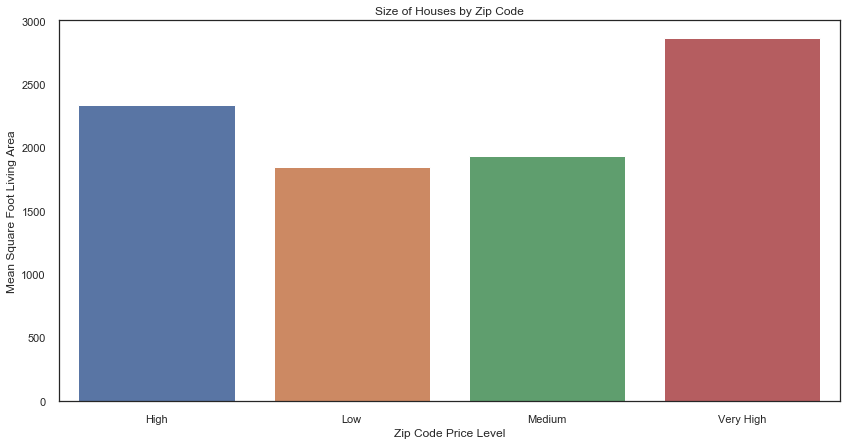

In [84]:
fig, ax = plt.subplots(figsize=(14, 7))
x=(['High','Low','Medium','Very High'])
sns.barplot(x,y = df.groupby('zip_price_level')['sqft_living'].mean());
ax.set(xlabel='Zip Code Price Level', ylabel='Mean Square Foot Living Area',title='Size of Houses by Zip Code');

In [85]:
f_stats, p_value =stats.f_oneway(df[df['zip_price_level'].eq('high')]['sqft_living'], 
               df[df['zip_price_level'].eq('low')]['sqft_living'], 
               df[df['zip_price_level'].eq('medium')]['sqft_living'],
               df[df['zip_price_level'].eq('very_high')]['sqft_living'],
                )

In [86]:
print(f'f-stat: {f_stats}, p_value: {p_value}')
print(f'We reject the null hypothesis since our p_value is very small')

f-stat: 523.563535719485, p_value: 0.0
We reject the null hypothesis since our p_value is very small


A very high f-stat and a very small p_value means that we should reject the null hypothesis, and the results are statistically signaificant.
